<a href="https://colab.research.google.com/github/Gleycykelly/lia1-2023-1/blob/main/Aula1FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height:10px"> 
 
<div class='container2'>
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2023/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial</b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2> Entrega 02 - Aula 1 - Fast.ai.</h2>

Notebook desenvolvido por: Gleycykelly Syssy Indymayer Carnot Amaro

 <hr style="height:2px"> 

In [ ]:
! pip3 install fastbook

In [ ]:
from fastbook import *

In [ ]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1, 'https://jooinn.com/images/birds-in-london-5.jpg')

In [ ]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

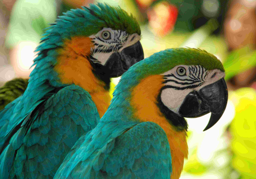

In [ ]:
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
    for o in searches:
        dest = (path/o)
        print(dest)
        dest.mkdir(exist_ok=True, parents=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size= 400, dest=dest)

bird_or_not\forest
bird_or_not\bird


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

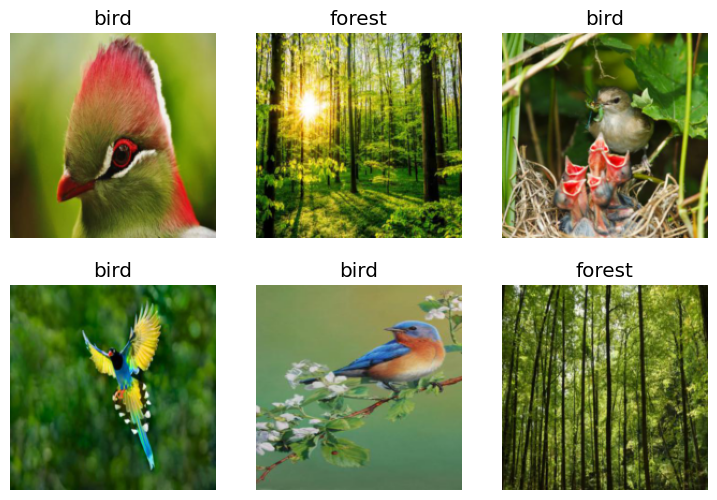

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

C:\Users\gleyc\anaconda3\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\gleyc\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\gleyc\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.644798,1.550689,0.360000,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.075734,0.106610,0.040000,00:13
1,0.038968,0.012402,0.013333,00:14
2,0.028090,0.004539,0.000000,00:15


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
